# Python - Exploratory Data Analysis on Spotify 2023 Dataset

### Directions
In this deliverable, you will perform an exploratory data analysis (EDA) on a dataset containing information about popular tracks on Most Streamed Spotify Songs 2023 (https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023Links to an external site.). This task aims to analyze, visualize, and interpret the data to extract meaningful insights.

In [1]:
# Import necessary libraries in manipulating data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import given dataset as 'spotify_data'

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
spotify_data = pd.read_csv('spotify-2023.csv')
spotify_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,213,88,17,946,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,222,43,13,418,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,89,30,13,194,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,210,48,11,953,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,110,66,13,339,170,D,Minor,81,56,48,21,0,8,33


---
### Overview of Dataset
* How many rows and columns does the dataset contain?
* What are the data types of each column? Are there any missing values?

In [5]:
# Number of rows and columns in the dataseet
rows, columns = spotify_data.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

Number of rows: 953
Number of columns: 24


In [7]:
# Data type and checking of missing values
print('Overview of the Spotify Data Information:\n')
print(spotify_data.info())
print('\nTotal number of missing values:\n\n', spotify_data.isnull().sum())

Overview of the Spotify Data Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 1

---
### Basic Descriptive Statistics
* What are the mean, median, and standard deviation of the streams column?
* What is the distribution of release_year and artist_count? Are there any noticeable trends or outliers?

In [9]:
# Convert 'streams' column to numeric
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')

# Remove rows where 'streams' is not convertible to a number
spotify_data = spotify_data.dropna(subset=['streams'])

# Calculate mean, median, and standard deviation
mean_streams = spotify_data['streams'].mean()
median_streams = spotify_data['streams'].median()
std_streams = spotify_data['streams'].std()

print(f'Mean: {mean_streams}')
print(f'Median: {median_streams}')
print(f'Standard Deviation: {std_streams}')

Mean: 514137424.93907565
Median: 290530915.0
Standard Deviation: 566856949.0388832


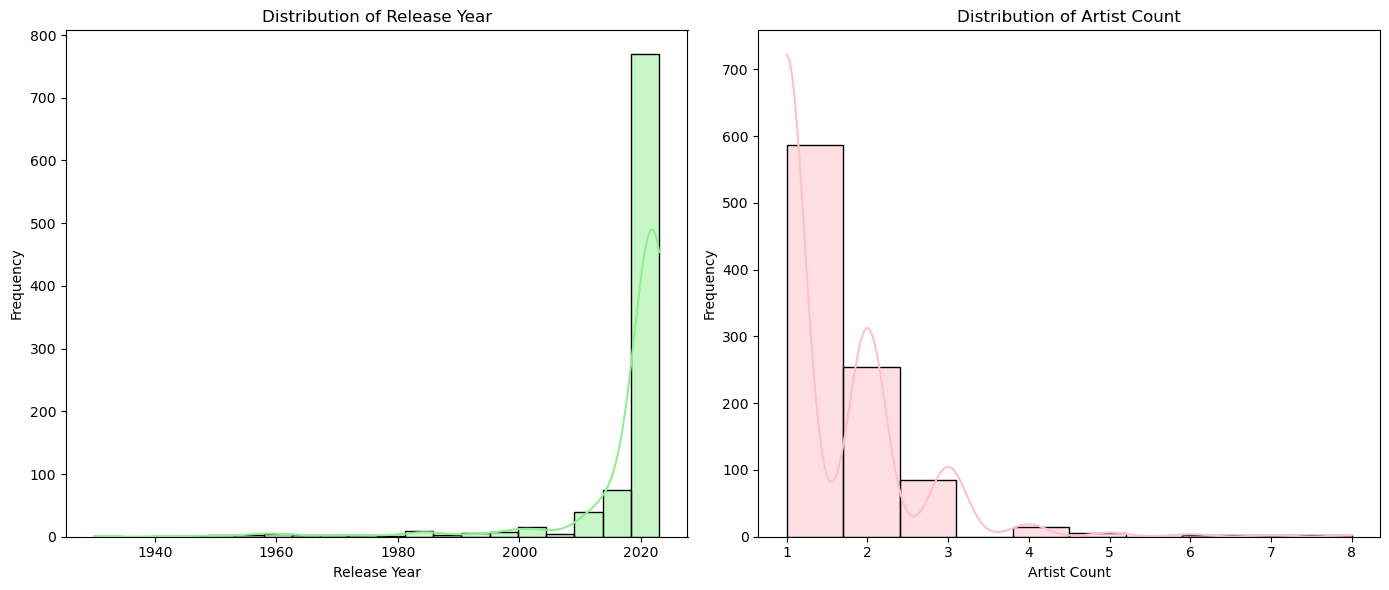

In [13]:
# Convert 'artist_count' and 'released_year' columns to numeric
for column in ['artist_count', 'released_year']:
    spotify_data[column] = pd.to_numeric(spotify_data[column], errors='coerce')

# Remove rows where 'artist_count' and 'released_year' are not convertible to a number
spotify_data = spotify_data.dropna(subset=['released_year', 'artist_count'])

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot histogram for 'released_year' on the first subplot
sns.histplot(spotify_data['released_year'], bins=20, kde=True, ax=axes[0], color='lightgreen')
axes[0].set_title("Distribution of Release Year")
axes[0].set_xlabel("Release Year")
axes[0].set_ylabel("Frequency")

# Plot histogram for 'artist_count' on the second subplot
sns.histplot(spotify_data['artist_count'], bins=10, kde=True, ax=axes[1], color='pink')
axes[1].set_title("Distribution of Artist Count")
axes[1].set_xlabel("Artist Count")
axes[1].set_ylabel("Frequency")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

---
### Top Performers
* Which track has the highest number of stream? Display the top 5 most stream tracks.
* Who are the top 5 most frequent artists based on the number of tracks in the dataset?

In [15]:
# Sort the spotify data from highest to lowest
sorted_tracks = spotify_data.sort_values(by='streams', ascending=False)

# Display the top 5 most streamed tracks
top_5_tracks = sorted_tracks.head()
top_5_tracks.loc[:,['track_name','artist(s)_name','streams']]

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3.703895e+09
179,Shape of You,Ed Sheeran,3.562544e+09
86,Someone You Loved,Lewis Capaldi,2.887242e+09
620,Dance Monkey,Tones and I,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09


In [17]:
# Split artist(s)_name into lists of artists for tracks with multiple artists
artist_data = spotify_data['artist(s)_name'].str.split(', ')

# Explode the lists into separate rows
exploded_data = artist_data.explode().value_counts().head()

# Convert the Series to a DataFrame
top_5_artists = exploded_data.reset_index()
top_5_artists.columns = ['Artist', 'Track Count']

top_5_artists

,Artist,Track Count
0,Bad Bunny,40
1,Taylor Swift,38
2,The Weeknd,37
3,SZA,23
4,Kendrick Lamar,23


---
### Temporal Trends
* Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.
* Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

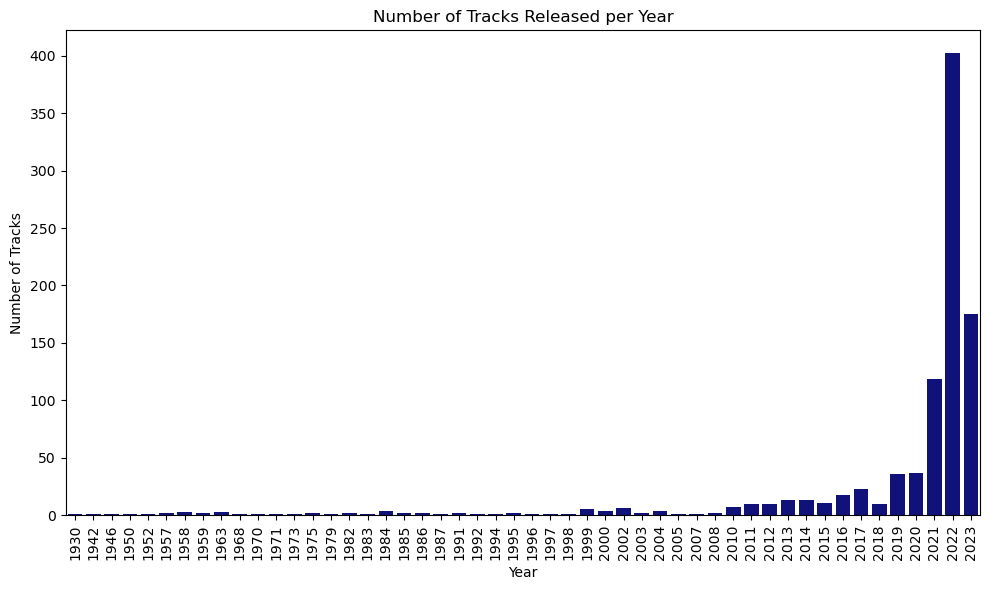

In [19]:
# Group by release_year and count the number of tracks
tracks_per_year = spotify_data.groupby('released_year').size().reset_index(name='track_count')

# Create a bar plot to trace the trends over time
plt.figure(figsize=(10, 6))
sns.barplot(data=tracks_per_year, x='released_year', y='track_count', color='darkblue')
plt.title("Number of Tracks Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Tracks")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

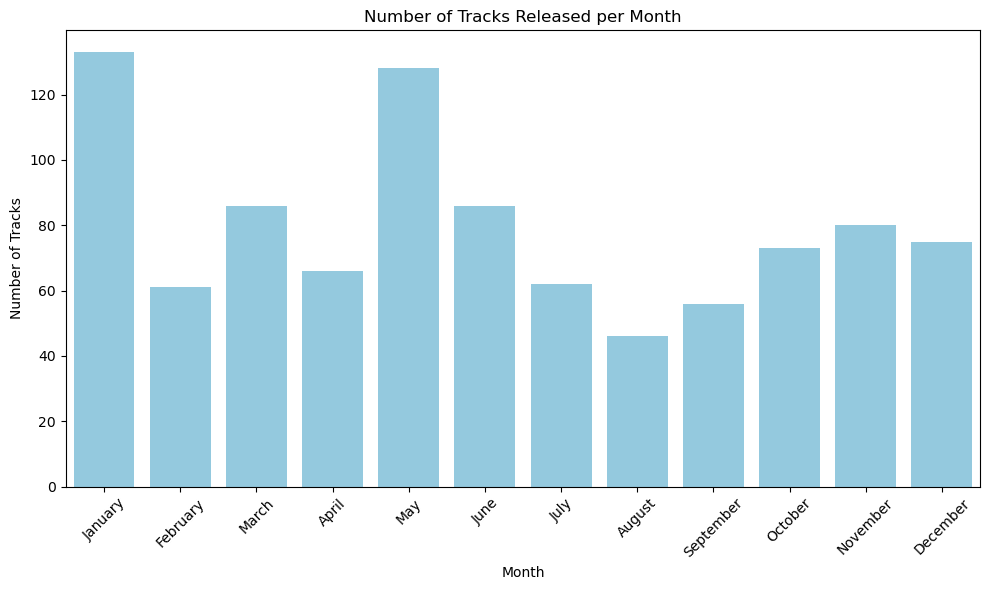

In [21]:
# Group by release_year and count the number of tracks
tracks_per_month = spotify_data.groupby('released_month').size().reset_index(name='track_count')

# Create a bar plot to trace the trends over time
plt.figure(figsize=(10, 6))
sns.barplot(data=tracks_per_month, x='released_month', y='track_count', color='skyblue')
plt.title("Number of Tracks Released per Month")
plt.xlabel("Month")
plt.ylabel("Number of Tracks")
plt.xticks(rotation = 45, ticks=range(12), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.tight_layout()
plt.show()

---
### Genre and Music Characteristics  
* Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?
* Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?

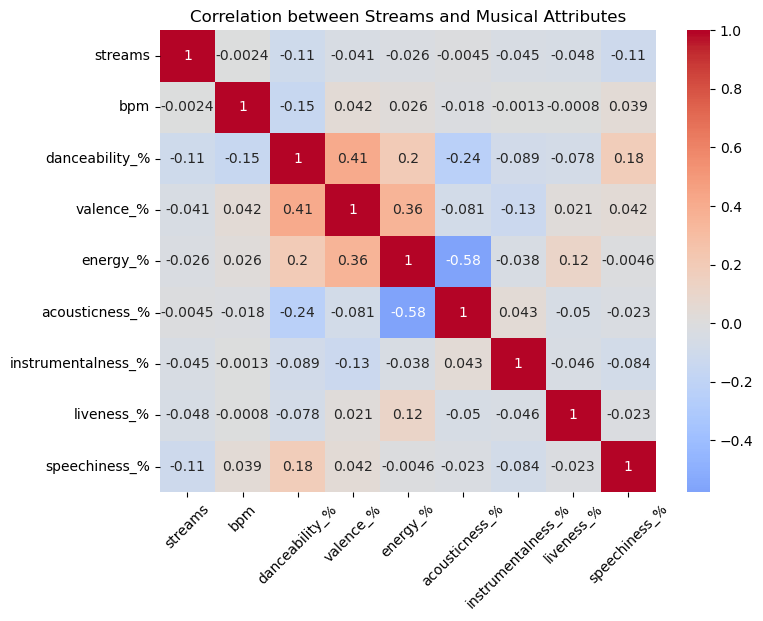

In [23]:
# Convert columns to numeric, coercing errors to NaN
columns_to_convert = ['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
for col in columns_to_convert:
    spotify_data[col] = pd.to_numeric(spotify_data[col], errors='coerce')
    
# Correlation between streams and musical attributes
correlation = spotify_data[columns_to_convert].corr()

# Heat map of the correlation between streams and musical attributes
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Streams and Musical Attributes')
plt.xticks(rotation=45)
plt.show()

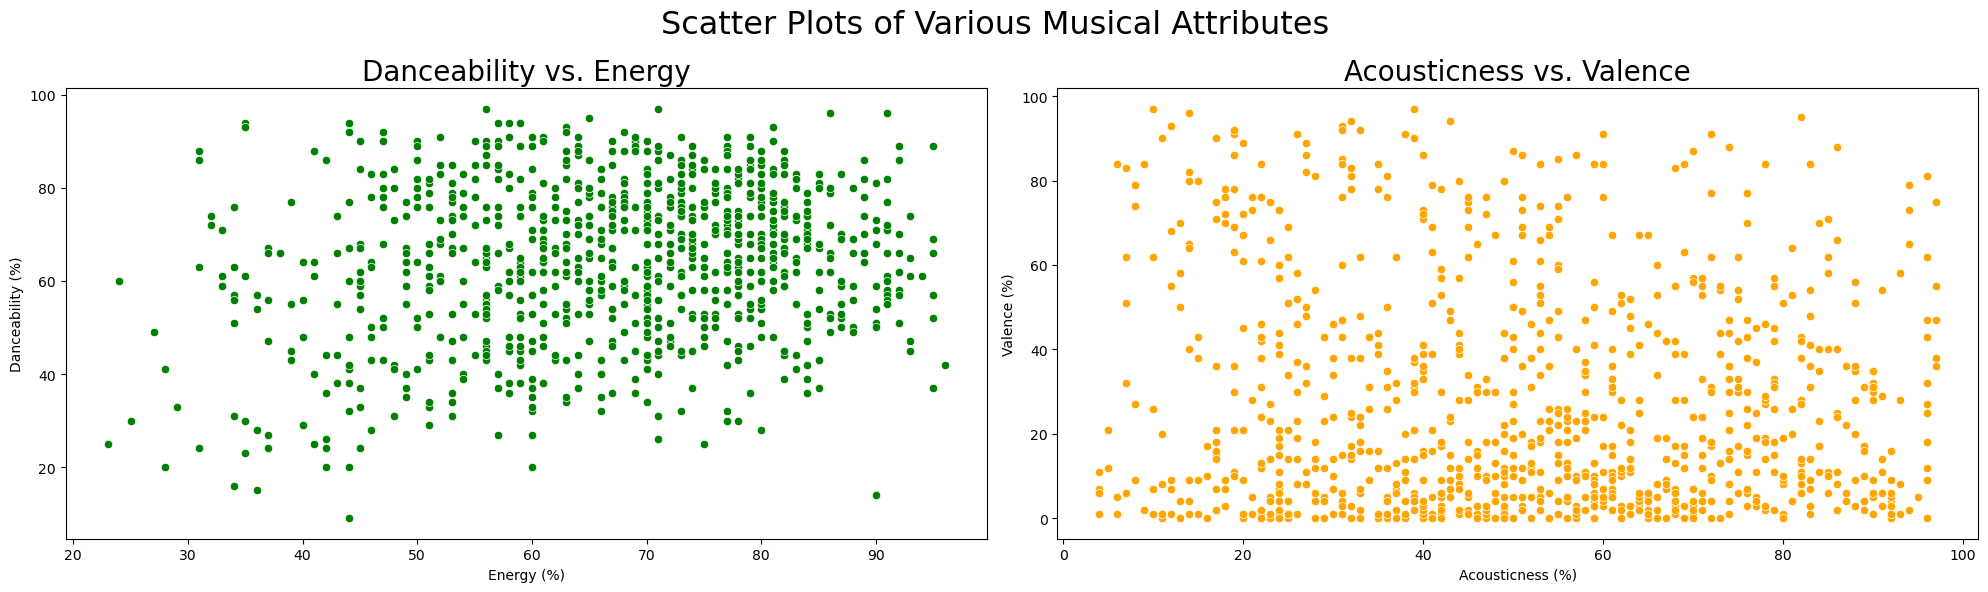

In [43]:
# Set up the figure grid for scatter plots
fig, axes = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Scatter Plots of Various Musical Attributes', fontsize=23)

# Scatterplot to visualize correlation between danceability_% and energy_%
sns.scatterplot(data=spotify_data, x='danceability_%', y='energy_%', ax=axes[0], color='green')
axes[0].set_title('Danceability vs. Energy', fontsize = 20)
axes[0].set_xlabel('Energy (%)')
axes[0].set_ylabel('Danceability (%)')

# Scatterplots to visualize correlation between valence_% and acousticness_%
sns.scatterplot(data=spotify_data, x='valence_%', y='acousticness_%', ax=axes[1], color='orange')
axes[1].set_title('Acousticness vs. Valence', fontsize = 20)
axes[1].set_xlabel('Acousticness (%)')
axes[1].set_ylabel('Valence (%)')

plt.tight_layout()
plt.show()

---
### Platform Popularity
* How do the numbers of tracks in spotify_playlists, deezer_playlist, and apple_playlists compare? Which platform seems to favor the most popular tracks?

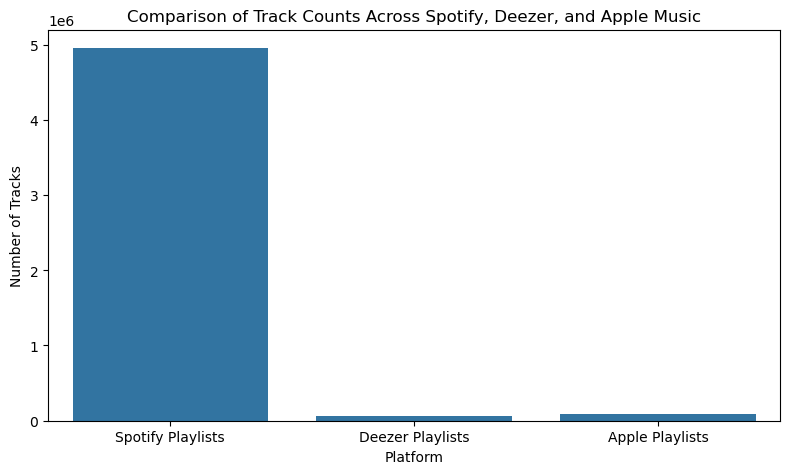

In [35]:
# Attempt to convert columns to numeric, setting errors='coerce' to convert non-numeric values to NaN
for column in ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']:
    spotify_data[column] = pd.to_numeric(spotify_data[column], errors='coerce')

# Sum of tracks on different platforms
platform_popularity_data = spotify_data[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum().reset_index()

# Renaming for better clarity
platform_popularity_data.columns = ['platform', 'track_count']

# Plotting the comparison on Spotify Playlists, Deezer Playlists, and Apple Playlists
plt.figure(figsize=(8, 5))
sns.barplot(data=platform_popularity_data, x='platform', y='track_count')
plt.title("Comparison of Track Counts Across Spotify, Deezer, and Apple Music")
plt.xlabel("Platform")
plt.ylabel("Number of Tracks")
plt.xticks(ticks = range(3), labels = ['Spotify Playlists','Deezer Playlists', 'Apple Playlists'])
plt.tight_layout()
plt.show()

###  Advanced Analysis
* Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?
* Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

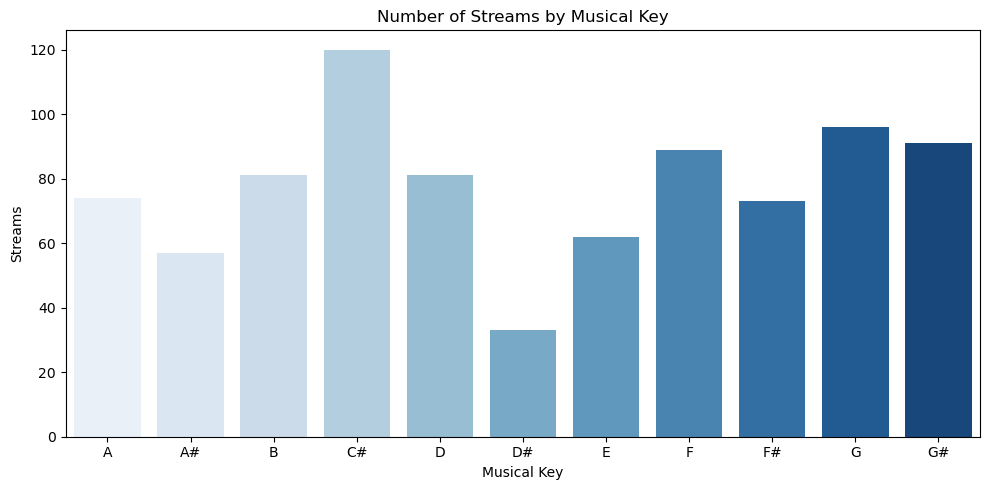

In [67]:
# Mean of streams grouped by key
key_streams = spotify_data.groupby('key')['streams'].size().reset_index()
key_streams.columns = ['Key', 'Streams']

# Plot average streams by key using bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=key_streams, x='Key', y='Streams', hue='Key', legend=False, palette='Blues')
plt.title("Number of Streams by Musical Key")
plt.xlabel("Musical Key")
plt.ylabel("Streams")
plt.tight_layout()
plt.show()

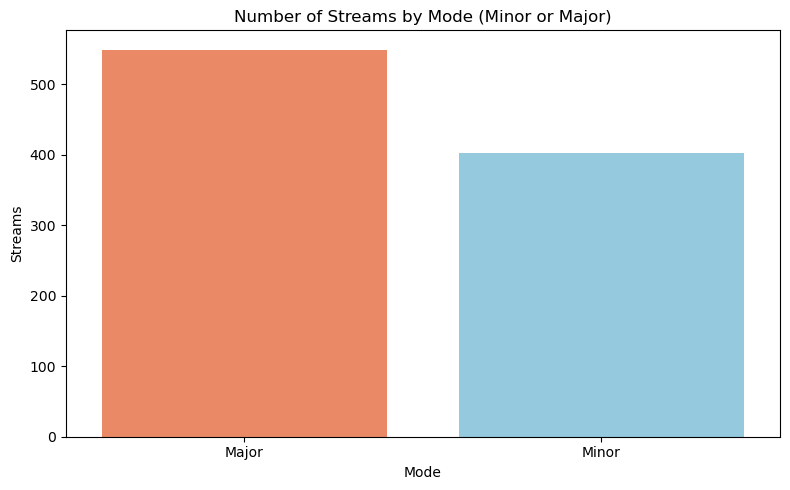

In [69]:
# Mean of streams grouped by mode
mode_streams = spotify_data.groupby('mode')['streams'].size().reset_index()
mode_streams.columns = ['Mode', 'Streams']

# Plot average streams by mode
plt.figure(figsize=(8, 5))
sns.barplot(data=mode_streams, x='Mode', y='Streams', hue='Mode', legend=False, palette=['coral', 'skyblue'])
plt.title("Number of Streams by Mode (Minor or Major)")
plt.xlabel("Mode")
plt.ylabel("Streams")
plt.tight_layout()
plt.show()

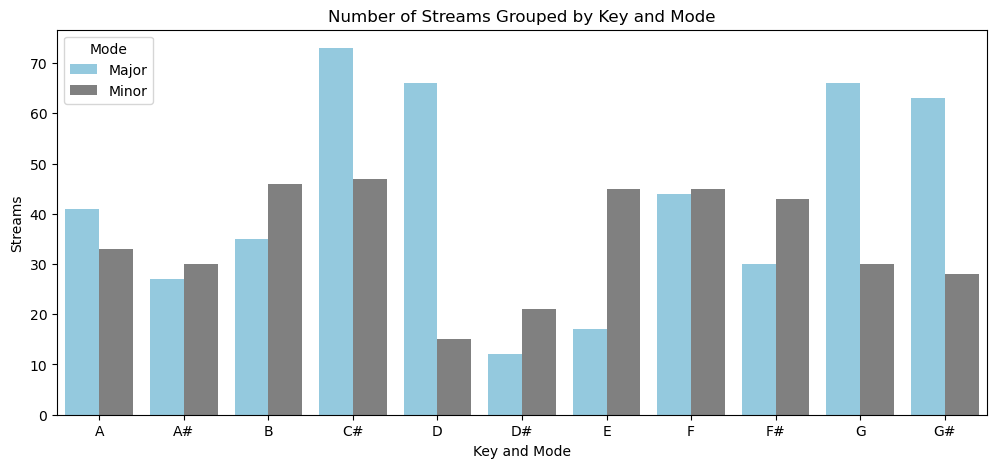

In [71]:
# Mean of streams grouped by key and mode
key_mode_streams = spotify_data.groupby(['key', 'mode'])['streams'].size().reset_index()

# Plotting average streams by key and mode using a grouped bar plot
plt.figure(figsize=(12,5))
sns.barplot(data=key_mode_streams, x='key', hue = 'mode', y='streams', palette = ['skyblue', 'gray'])
plt.title('Number of Streams Grouped by Key and Mode')
plt.ylabel('Streams')
plt.xlabel('Key and Mode')
plt.legend(title='Mode')
plt.show()

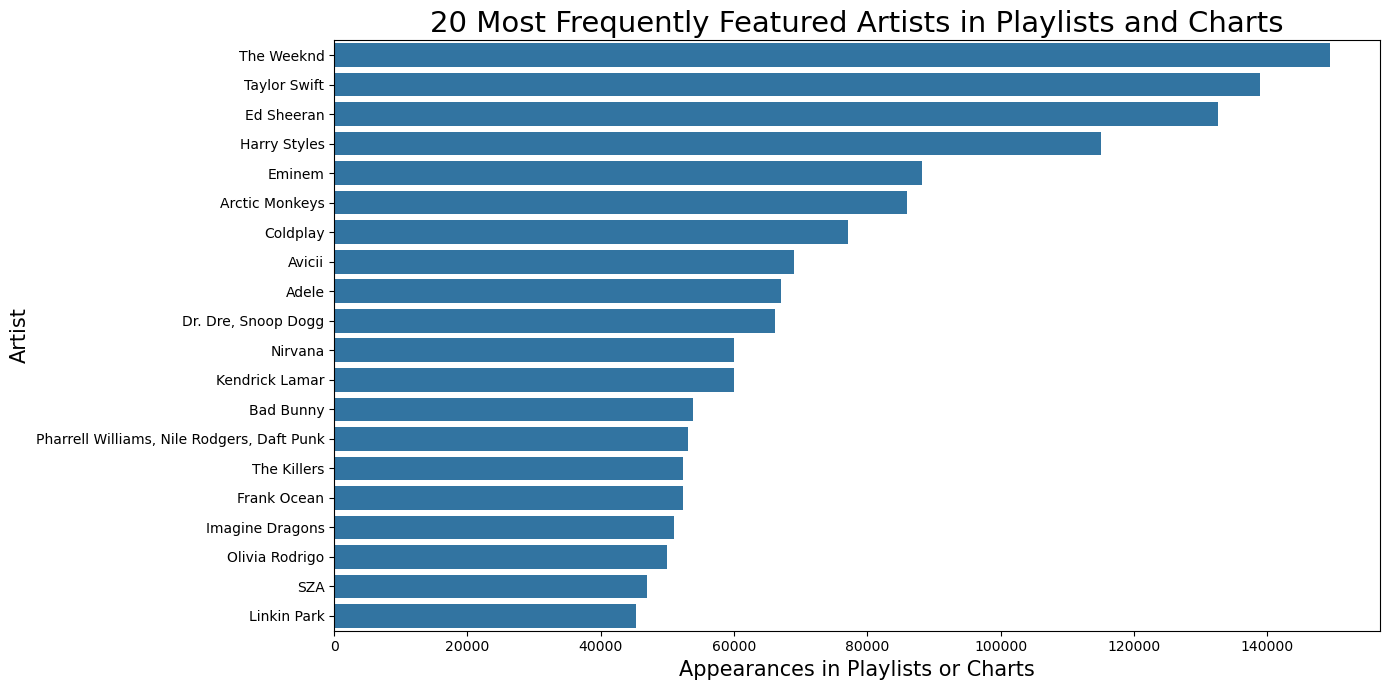

In [231]:
# List of the columns that relates to platform appearances
platform_columns = ['in_spotify_playlists', 'in_spotify_charts', 
                    'in_apple_playlists', 'in_apple_charts', 
                    'in_deezer_playlists', 'in_deezer_charts']

# Group by artist(s)_name and sum the values of the platform columns
artist_counts = spotify_data.groupby('artist(s)_name')[platform_columns].sum().sum(axis=1).sort_values(ascending=False)

# Get the top 10 most frequently appearing artists
frequently_appearing = artist_counts.head(20).reset_index()
frequently_appearing.columns = ['Artist', 'Appearances']

# Plotting the top 10 artists
plt.figure(figsize=(14, 7))
sns.barplot(data=frequently_appearing, x='Appearances', y='Artist')
plt.title('20 Most Frequently Featured Artists in Playlists and Charts', fontsize=21)
plt.xlabel('Appearances in Playlists or Charts', fontsize=15)
plt.ylabel('Artist', fontsize=15)
plt.tight_layout() 
plt.show()